In [3]:
import pandas as pd


# Set display options for better output readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


def load_and_examine_data():
    # Load the dataset
    df = pd.read_csv('../Amazon_dataset/customer_review_amazon_products.csv')    
    # Display basic information about the dataset
    print("\nDataset Info:")
    print(df.info())
    
    print("\nFirst few rows of the dataset:")
    print(df.head())
    
    print("\nBasic statistics:")
    print(df.describe())
    
    print("\nMissing values:")
    print(df.isnull().sum())
    
    return df


if __name__ == "__main__":
    df = load_and_examine_data() 


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  revi

C:\Users\edwar\AppData\Local\Temp\ipykernel_40540\2325253362.py:11: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Amazon_dataset/customer_review_amazon_products.csv')


## Plots for the features distribution

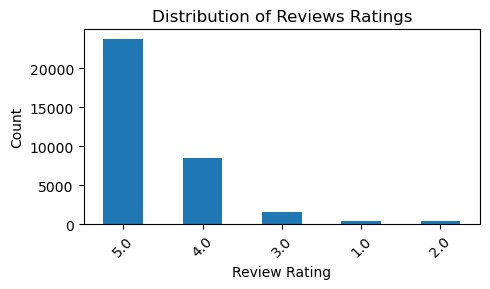

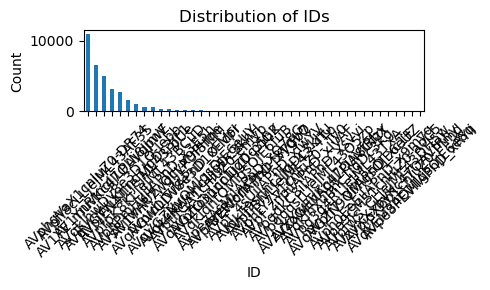

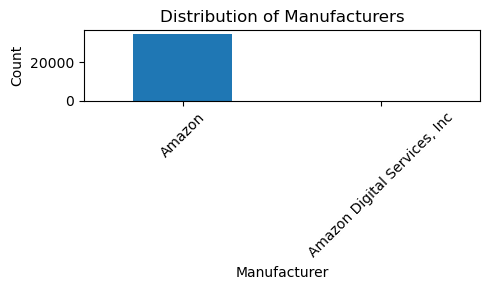

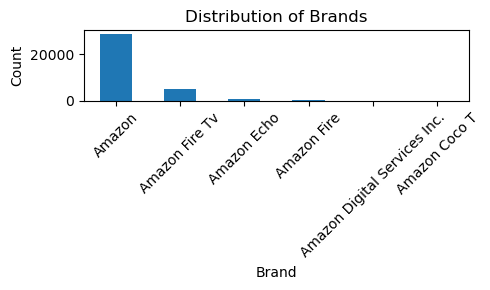

In [4]:
#Make plot that shows the distribution of the Primary Category, categories and brand
import matplotlib.pyplot as plt
"""
plt.figure(figsize=(5, 3))
df['categories'].value_counts().plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Primary Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
"""

#Make plot that shows the distribution of the reviews.rating
plt.figure(figsize=(5, 3))
df['reviews.rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Reviews Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Make plot that shows the distribution of the ID
plt.figure(figsize=(5, 3))
df['id'].value_counts().plot(kind='bar')
plt.title('Distribution of IDs')
plt.xlabel('ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Make plot that shows the distribution of the manufacturer nad manufacturernumber
plt.figure(figsize=(5, 3))
df['manufacturer'].value_counts().plot(kind='bar')
plt.title('Distribution of Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##Make plot that shows the distribution of the brand
plt.figure(figsize=(5, 3))
df['brand'].value_counts().plot(kind='bar')
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
review=pd.DataFrame(df.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews.rating,No of Users
0,5.0,23775
1,4.0,8541
2,3.0,1499
3,1.0,410
4,2.0,402


In [6]:
# Clean columns review.userCity, review.userProvince
df = df.drop(columns=['reviews.userCity', 
        'reviews.userProvince',
        'reviews.id',
        'reviews.didPurchase',
        'reviews.sourceURLs',
        'reviews.dateSeen',
        'name',
        'keys',
        'reviews.dateAdded',
        'manufacturer',
        'reviews.date',
        'reviews.numHelpful',
        'asins',
        'categories',
        'reviews.sourceURLs',
        'brand',
        'manufacturer',
        'reviews.dateSeen',
        'id','reviews.doRecommend',
        'reviews.username'])
        #removing asins as it is redundant, manufactor are all the same, keys are not needed(bunch of numbers and letters), 
        # reviews.dateSeen is not needed as it is the same as reviews.date, reviews.dateAdded has nulls, 
        # reviews.userCity and reviews.userProvince are all nulls
df.info()
df.isnull().any()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34627 non-null  float64
 1   reviews.text    34659 non-null  object 
 2   reviews.title   34654 non-null  object 
dtypes: float64(1), object(2)
memory usage: 812.5+ KB


reviews.rating    True
reviews.text      True
reviews.title     True
dtype: bool

In [7]:
#Elimiate remaining nulls
df.dropna()
print(df.isnull().any())
print(df.info())

reviews.rating    True
reviews.text      True
reviews.title     True
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34627 non-null  float64
 1   reviews.text    34659 non-null  object 
 2   reviews.title   34654 non-null  object 
dtypes: float64(1), object(2)
memory usage: 812.5+ KB
None


In [8]:
df.head(5)

,reviews.rating,reviews.text,reviews.title
0,5.0,This product so far has not disappointed. My c...,Kindle
1,5.0,great for beginner or experienced person. Boug...,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


## This did not work, we need to balance the dataset
- He we try to balance the dataset by removing spliting the dataset into 1 and 5 star review. 
##new_df = df[(df['reviews.rating'] == 1) | (df['reviews.rating'] == 5)]
##new_df=new_df.dropna()
##print(new_df.shape)

##print(new_df.head())
##print(new_df.isnull().any())

#Make plot that shows the distribution of the reviews.rating
plt.figure(figsize=(5, 3))
new_df['reviews.rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Reviews Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Dataset is still very unbalanced, we need to balance it
1) We will add more data from other datasets and filter it to only include the reviews.rating 1 to 5. I dont need the 5 star reviews, since this is the most common rating, the one making the dataset unbalanced.
2) use undersampling to balance the dataset.


In [10]:
# 1) We will add more data from other datasets and filter it to only include the reviews.rating 1 to 3. I dont need the 5 star reviews, since this is the most common rating, the one making the dataset unbalanced.

data2=pd.read_csv('../Amazon_dataset/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
data2=data2[data2['reviews.rating'] <= 3]
data2 = data2[['reviews.rating','reviews.text','reviews.title'] ]
data2=data2.dropna()
print(data2.shape)

data3=pd.read_csv('../Amazon_dataset/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
data3=data3[data3['reviews.rating'] <= 3]
data3 = data3[['reviews.rating','reviews.text','reviews.title'] ]
data3=data3.dropna()
print(data3.shape)

# Now we will concatenate the dataframes
new_df = pd.concat([df, data2, data3], ignore_index=True)
new_df.dropna()
print(new_df.shape)


(314, 3)
(2787, 3)
(37761, 3)


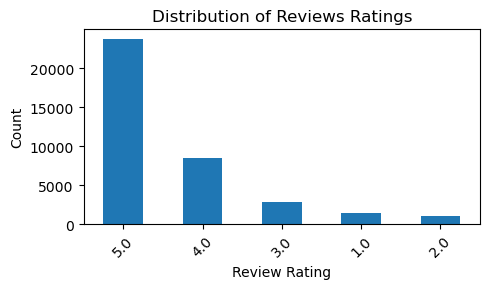

In [11]:
#Make plot that shows the distribution of the reviews.rating
plt.figure(figsize=(5, 3))
new_df['reviews.rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Reviews Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
review=pd.DataFrame(new_df.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews.rating,No of Users
0,5.0,23775
1,4.0,8541
2,3.0,2902
3,1.0,1438
4,2.0,1072


In [13]:
# First, clean the data by removing null values
#new_df = new_df.dropna(subset=['reviews.rating', 'reviews.text','reviews.title'])

new_df = new_df.dropna(subset=['reviews.rating', 'reviews.text'])
print(new_df.isnull().any())
print(new_df.shape)



reviews.rating    False
reviews.text      False
reviews.title      True
dtype: bool
(37727, 3)


In [14]:


# Prepare X and y
X = new_df['reviews.text']
y = new_df['reviews.rating']

## Vectorize,Tokenize the text,remove stopwords and balance datasets 


In [26]:
# Define the text processing function
import string
import nltk
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')

def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        
        # Remove punctuation
        nopunc = [char for char in text if char not in string.punctuation]
        nopunc = ''.join(nopunc)
        
        # Remove stopwords and split into words
        return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return []



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
# Create sentiment categories
def get_sentiment(rating):
    if rating <= 2:
        return 'negative'    # ratings 1-2
    elif rating == 3:
        return 'neutral'     # rating 3
    else:
        return 'positive'    # ratings 4-5

y_sentiment = y.map(get_sentiment)

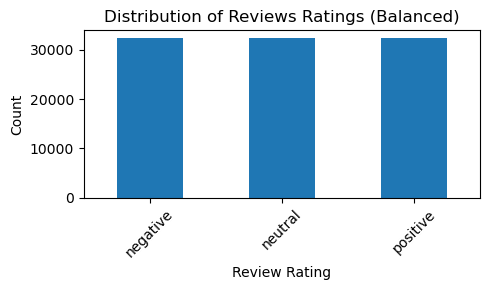

In [30]:
# 1. First vectorize the text data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. First vectorize all the data
tfidf_transformer = TfidfVectorizer(analyzer=text_process)
X_vectorized = tfidf_transformer.fit_transform(X)

# 2. Apply SMOTE on the vectorized data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_vectorized, y_sentiment)

# Plot y_balanced distribution
plt.figure(figsize=(5, 3))
pd.Series(y_balanced).value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Reviews Ratings (Balanced)')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Split the dataset into training and testing

Training set shape: (77541, 19477)
Testing set shape: (19386, 19477)

Distribution in training set:
reviews.rating
neutral     25921
positive    25821
negative    25799
Name: count, dtype: int64

Distribution in test set:
reviews.rating
negative    6510
positive    6488
neutral     6388
Name: count, dtype: int64


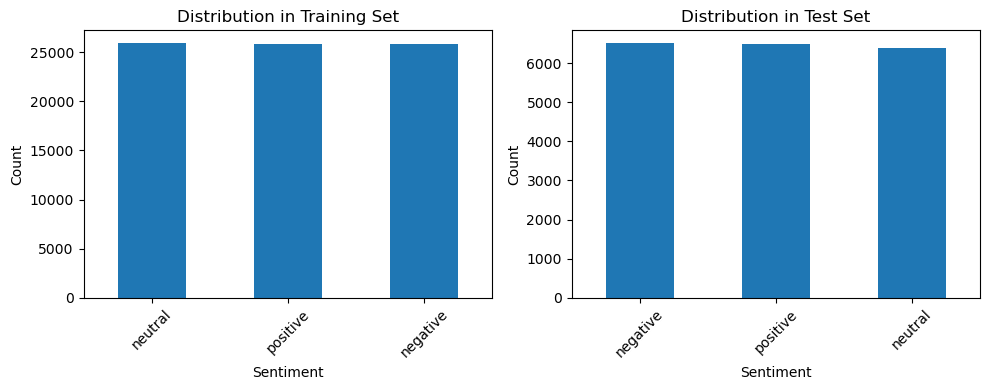

In [31]:
from sklearn.model_selection import train_test_split
# 3. Split the balanced and vectorized dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, 
    y_balanced,
    test_size=0.2,
    random_state=42
)

# Print shapes to verify
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Print distribution of classes
print("\nDistribution in training set:")
print(pd.Series(y_train).value_counts())
print("\nDistribution in test set:")
print(pd.Series(y_test).value_counts())

# Plot the new class distribution after oversampling
plt.figure(figsize=(10, 4))

# Create two subplots
plt.subplot(1, 2, 1)
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title('Distribution in Training Set')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
pd.Series(y_test).value_counts().plot(kind='bar')
plt.title('Distribution in Test Set')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## TRAINING THE MODEL Navie Bayes

In [32]:
#Lets start training the model using Navie Bayes
from sklearn.naive_bayes import MultinomialNB

# Create the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)


In [33]:
#Evaluate the model- Precision, recall, and F1-score for each class are as follow
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.89      0.87      6510
     neutral       0.80      0.77      0.79      6388
    positive       0.86      0.86      0.86      6488

    accuracy                           0.84     19386
   macro avg       0.84      0.84      0.84     19386
weighted avg       0.84      0.84      0.84     19386



In [34]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[5775  495  240]
 [ 793 4916  679]
 [ 179  701 5608]]


## TRAINING THE MODEL Random Forest


In [46]:
#Lets start training the model using Random fores model
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the Random Forest model
rf_classifier = RandomForestClassifier(
    #class_weight='balanced',
    criterion='gini',
    n_estimators=100,  # number of trees
    max_depth=None,    # maximum depth of trees
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    warm_start = False,
    verbose = 1    # for reproducibility
)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


Accuracy: 0.99

Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.99      0.99      0.99      6510
     neutral       0.98      0.99      0.98      6388
    positive       0.99      0.98      0.99      6488

    accuracy                           0.99     19386
   macro avg       0.99      0.99      0.99     19386
weighted avg       0.99      0.99      0.99     19386



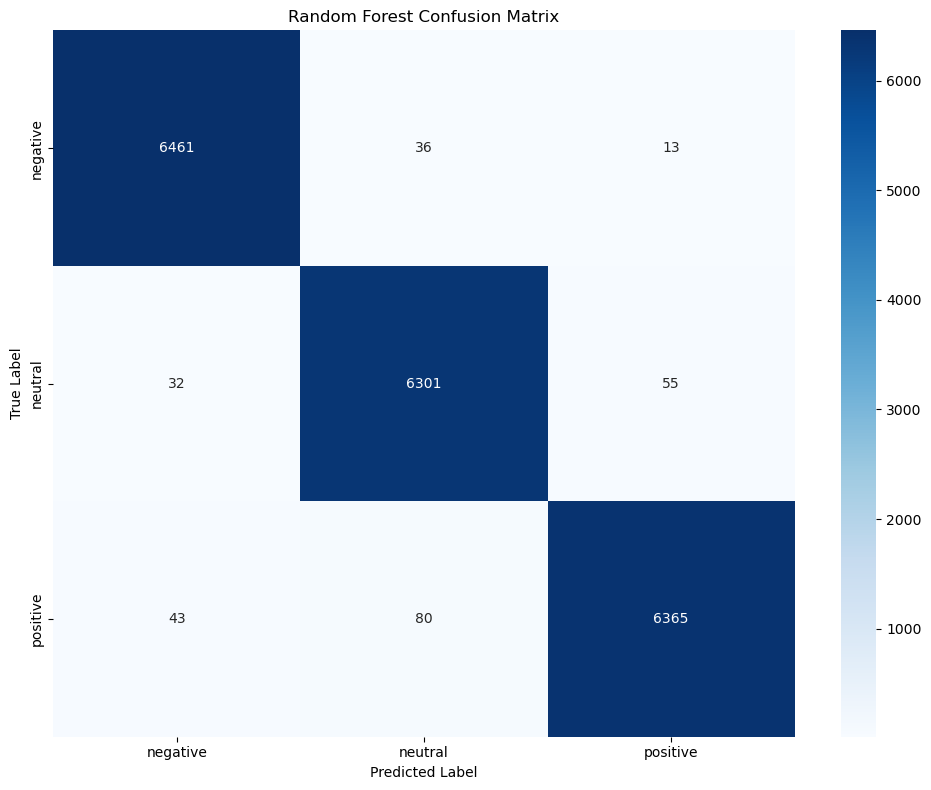

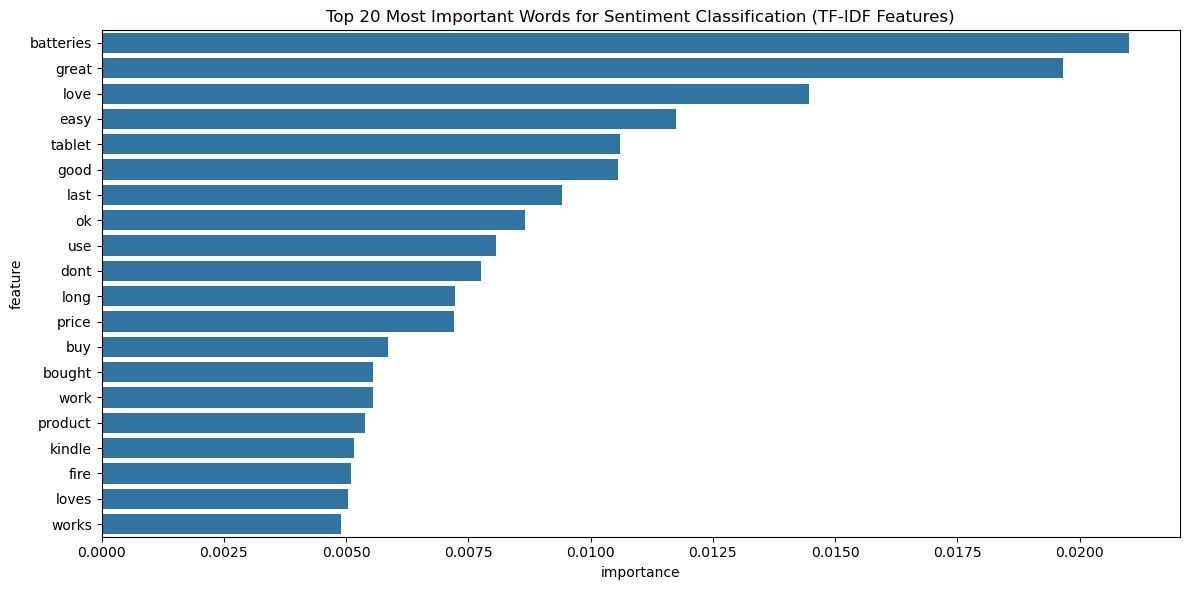

In [47]:
# Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

#CounterVectorizing
"""
# Feature importance (one of the benefits of Random Forest)
feature_importance = pd.DataFrame({
    'feature': bow_transformer.get_feature_names_out(),
    'importance': rf_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Words for Sentiment Classification')
plt.tight_layout()
plt.show()
"""
# Feature importance (one of the benefits of Random Forest)
feature_importance = pd.DataFrame({
    'feature': tfidf_transformer.get_feature_names_out(),
    'importance': rf_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Words for Sentiment Classification (TF-IDF Features)')
plt.tight_layout()
plt.show()


In [38]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())
print("CV score standard deviation:", cv_scores.std())

c:\Users\edwar\anaconda3\envs\lab_npl_gpu\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
c:\Users\edwar\anaconda3\envs\lab_npl_gpu\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place

Cross-validation scores: [0.98084983 0.98084859 0.98091308 0.98284756 0.9800748 ]
Average CV score: 0.981106772635683
CV score standard deviation: 0.0009236352971816066


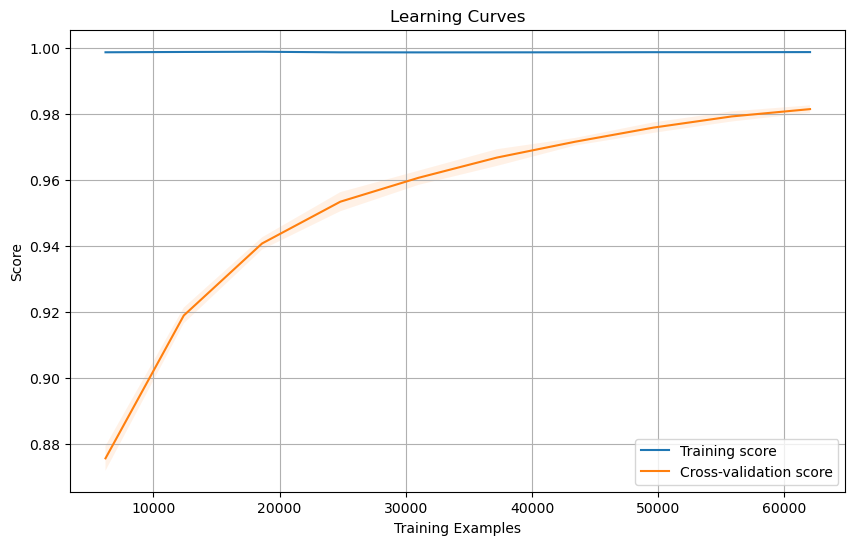

In [39]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    # Calculate mean and std
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10,6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    
    # Plot standard deviation bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curves')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(rf_classifier, X_train, y_train)

## Analysis
# These cross-validation results are actually quite informative! Let's analyze them:
1. Consistency across folds:
- The scores across all 5 folds are very consistent (ranging from 0.980 to 0.982)
- The standard deviation is very small (0.00092), which is excellent
- This consistency suggests that your model is stable and performs similarly across different subsets of the data
2. Average CV Score:
- Average score of 0.981 (98.1%) is slightly lower than your test set accuracy of 0.99
- This small difference (about 0.9%) between CV and test performance suggests that your model isn't severely overfitting
- It's performing consistently well across different data splits
3. Analysis:
- The high scores with low variance suggest your model is genuinely learning the patterns in your data
- The small gap between CV scores and test accuracy indicates minimal overfitting
- The extremely low standard deviation (0.00092) shows remarkable stability in model performance
# Conclusion:
Based on these cross-validation results, I would say your model is NOT overfitting. The reasons are:
1. Very stable performance across different data splits
2. Small difference between CV and test performance
3. Extremely low standard deviation in CV scores

Your Random Forest model appears to be genuinely good at this classification task, likely because:
- The relationship between review text and sentiment might be relatively straightforward
- You probably have a good feature representation
- The classes are well-balanced after your preprocessing

# This learning curve plot shows some interesting patterns:
1) Training Score (Blue Line):
- Remains consistently high (around 1.0)
- Shows almost no variation with increasing training examples
- This indicates high training accuracy throughout
2) Cross-validation Score (Orange Line):
- Starts lower (around 0.88)
- Steadily improves as more training examples are added
- Eventually reaches about 0.98
- The curve is smooth and continues to show slight improvement
3) Gap Analysis:
- There is a noticeable gap between training and cross-validation scores
- However, this gap narrows as more training examples are added
- The cross-validation score is still improving slightly at the end

Interpretation:
- The model shows some signs of overfitting (gap between training and CV scores)
- BUT, the improving CV score with more data is a very positive sign
- The narrowing gap with more data suggests that additional training examples would continue to improve generalization
- The high final CV score (around 0.98) aligns well with your previous cross-validation results

## Random forest Regularized

In [51]:
rf_regularized = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,                  # Limit tree depth
    min_samples_split=5,           # Require more samples to split
    min_samples_leaf=4,            # Require more samples in leaves
    max_features='sqrt',           # Reduce features considered per split
    max_samples=0.8,              # Use bootstrapping with 80% of samples
    random_state=42
)

# Train the model
rf_regularized.fit(X_train, y_train)

# Make predictions
y_pred = rf_regularized.predict(X_test)

Accuracy: 0.91

Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.95      0.95      6510
     neutral       0.92      0.87      0.89      6388
    positive       0.88      0.93      0.91      6488

    accuracy                           0.91     19386
   macro avg       0.92      0.91      0.91     19386
weighted avg       0.92      0.91      0.91     19386



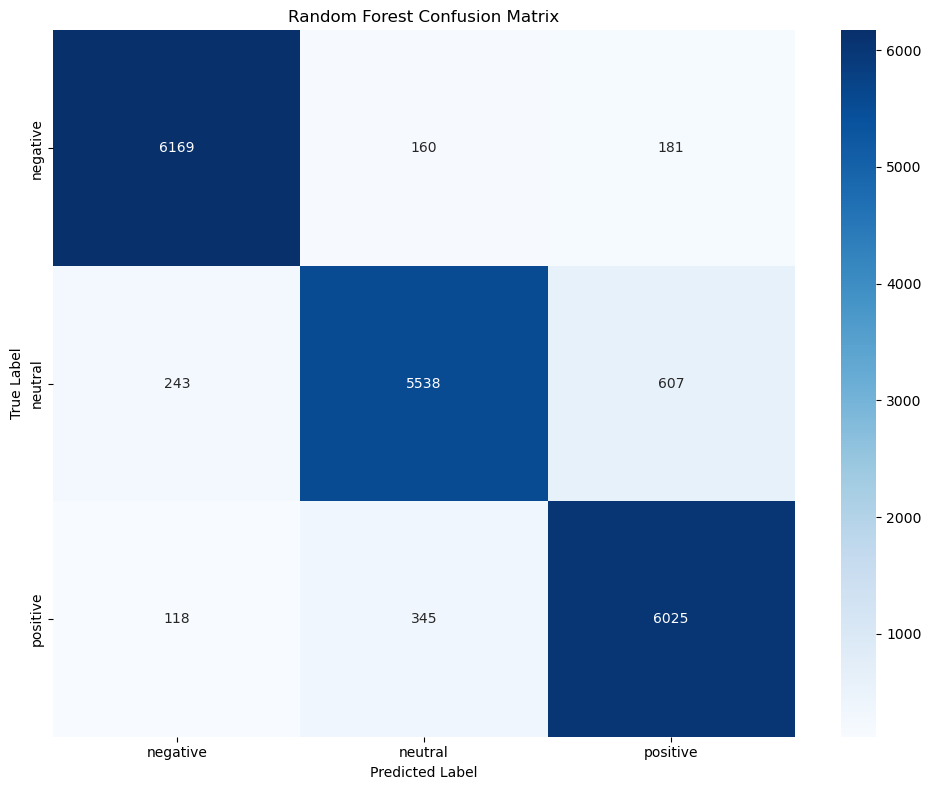

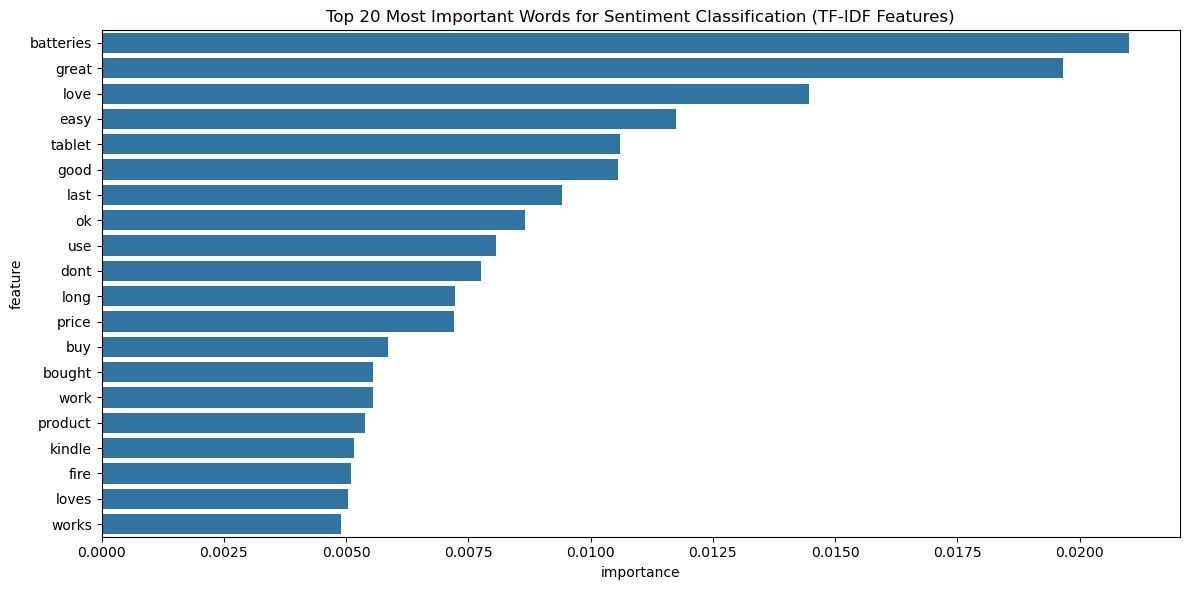

In [52]:
# Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature importance (one of the benefits of Random Forest)
feature_importance = pd.DataFrame({
    'feature': tfidf_transformer.get_feature_names_out(),
    'importance': rf_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Words for Sentiment Classification (TF-IDF Features)')
plt.tight_layout()
plt.show()


## Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_regularized, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())
print("CV score standard deviation:", cv_scores.std())

Cross-validation scores: [0.89941324 0.90346918 0.90063193 0.9048878  0.89760124]
Average CV score: 0.9012006781887552
CV score standard deviation: 0.0026538770363785692


## Plot Learning Curve

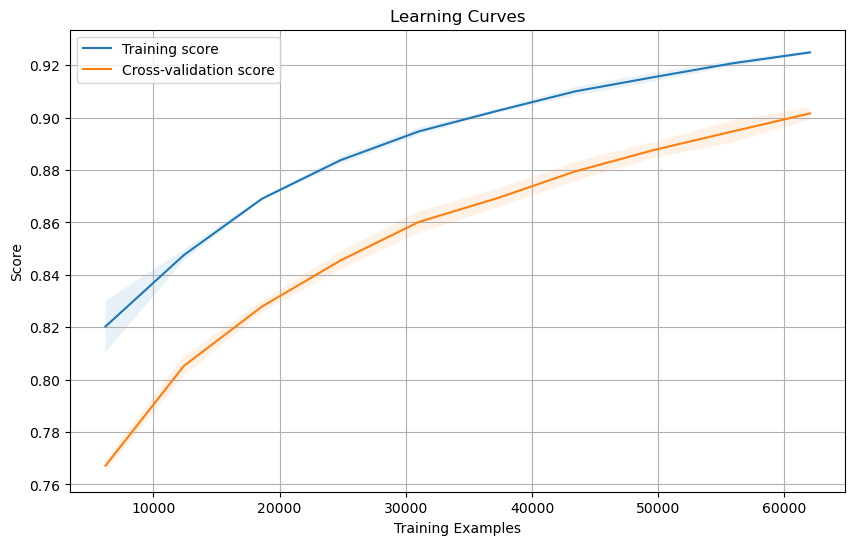

In [55]:
# PLOT
plot_learning_curve(rf_regularized, X_train, y_train)

## Let try training the model with GradientBoosting

Accuracy: 0.66

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.68      0.72      6510
     neutral       0.52      0.71      0.60      6388
    positive       0.78      0.61      0.68      6488

    accuracy                           0.66     19386
   macro avg       0.69      0.66      0.67     19386
weighted avg       0.69      0.66      0.67     19386



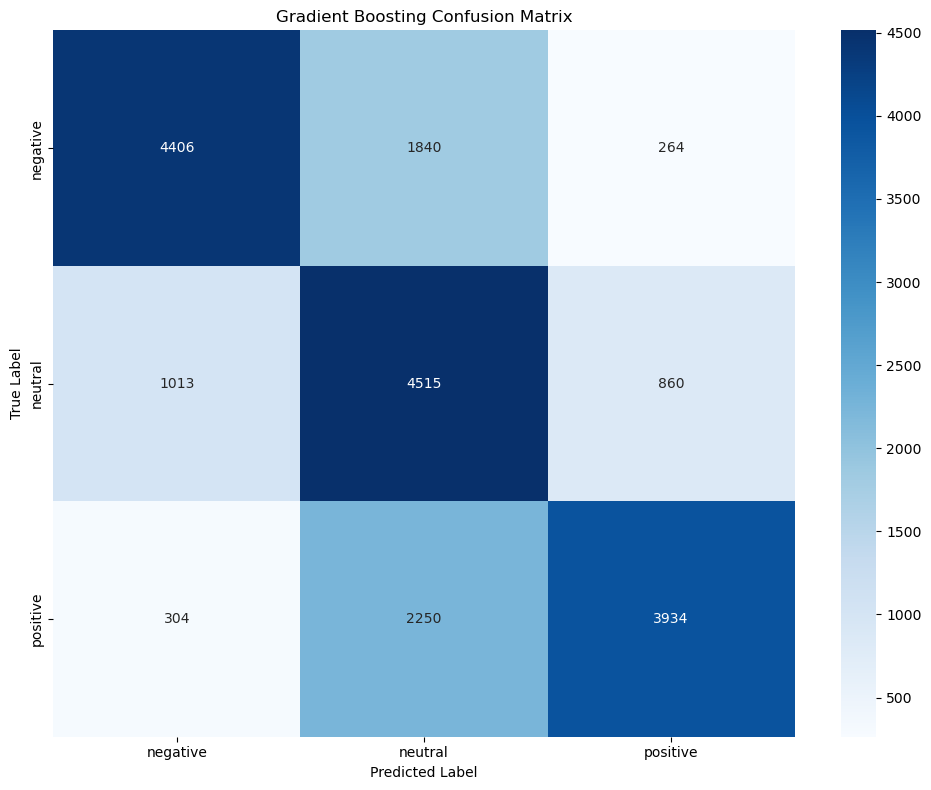

In [56]:

# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,    # number of boosting stages
    learning_rate=0.01,   # shrinks the contribution of each tree
    max_depth=5,         # maximum depth of each tree
    min_samples_split=2,
    subsample=0.8,       # fraction of samples used for fitting
    random_state=42
)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Gradient Boosting Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


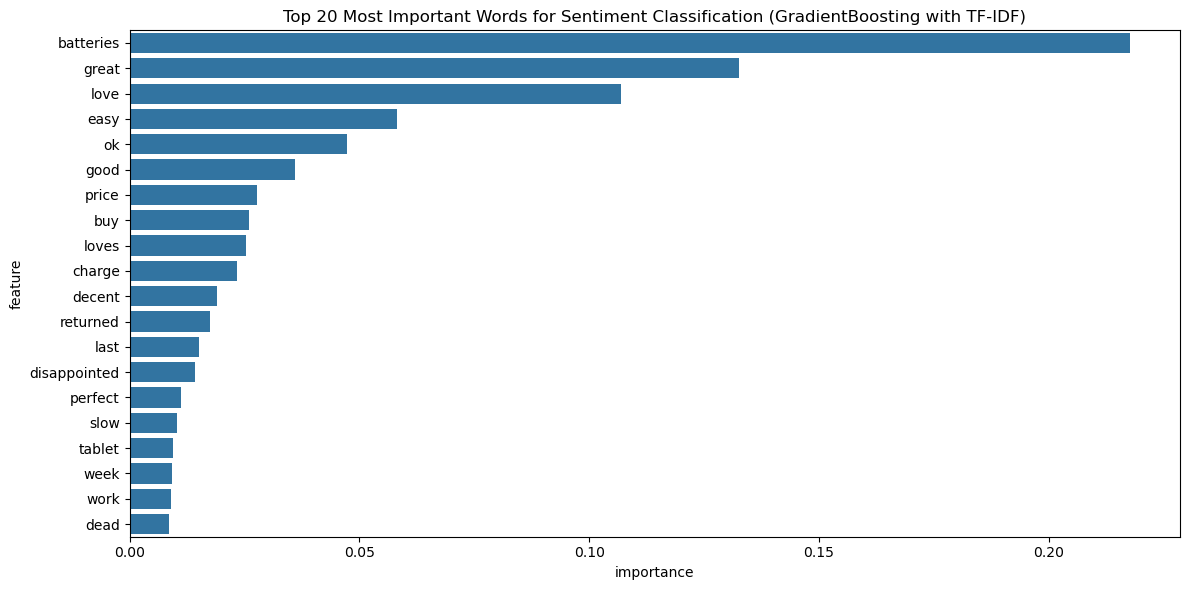

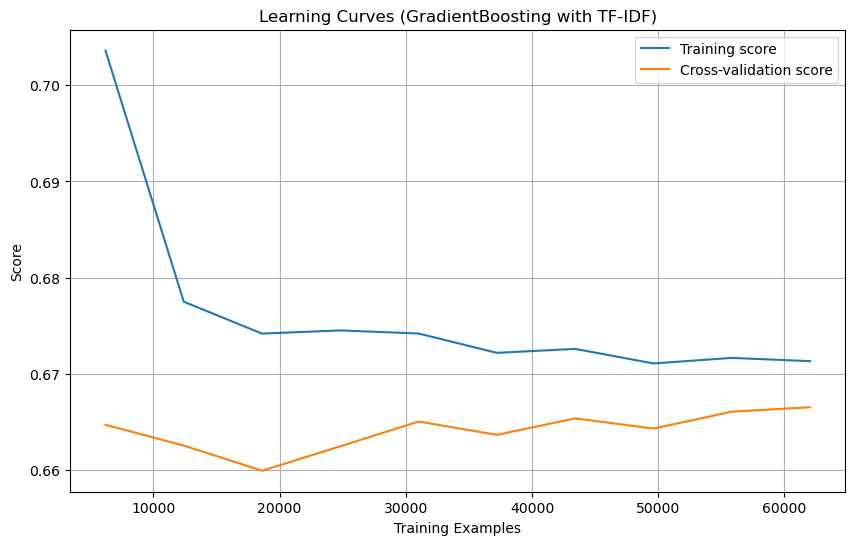

In [63]:

# Feature importance
feature_importance = pd.DataFrame({
    'feature': tfidf_transformer.get_feature_names_out(),  # Changed from bow_transformer to tfidf_vectorizer
    'importance': gb_classifier.feature_importances_      # Changed from gb_classifier to rf_classifier
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Words for Sentiment Classification (GradientBoosting with TF-IDF)')
plt.tight_layout()
plt.show()

# Learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    gb_classifier, X_train, y_train,  # Changed from X_train_transformed to X_train
    cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves (GradientBoosting with TF-IDF)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


## Let try training the model with XGBoost

[0]	validation_0-mlogloss:1.06923	validation_1-mlogloss:1.06928
[1]	validation_0-mlogloss:1.03811	validation_1-mlogloss:1.03828
[2]	validation_0-mlogloss:1.01305	validation_1-mlogloss:1.01358
[3]	validation_0-mlogloss:0.98868	validation_1-mlogloss:0.98926
[4]	validation_0-mlogloss:0.96726	validation_1-mlogloss:0.96793
[5]	validation_0-mlogloss:0.94862	validation_1-mlogloss:0.94946
[6]	validation_0-mlogloss:0.93179	validation_1-mlogloss:0.93274
[7]	validation_0-mlogloss:0.91618	validation_1-mlogloss:0.91735
[8]	validation_0-mlogloss:0.90179	validation_1-mlogloss:0.90300
[9]	validation_0-mlogloss:0.88895	validation_1-mlogloss:0.89041
[10]	validation_0-mlogloss:0.87651	validation_1-mlogloss:0.87827
[11]	validation_0-mlogloss:0.86514	validation_1-mlogloss:0.86725
[12]	validation_0-mlogloss:0.85457	validation_1-mlogloss:0.85708
[13]	validation_0-mlogloss:0.84479	validation_1-mlogloss:0.84760
[14]	validation_0-mlogloss:0.83493	validation_1-mlogloss:0.83803
[15]	validation_0-mlogloss:0.82616	

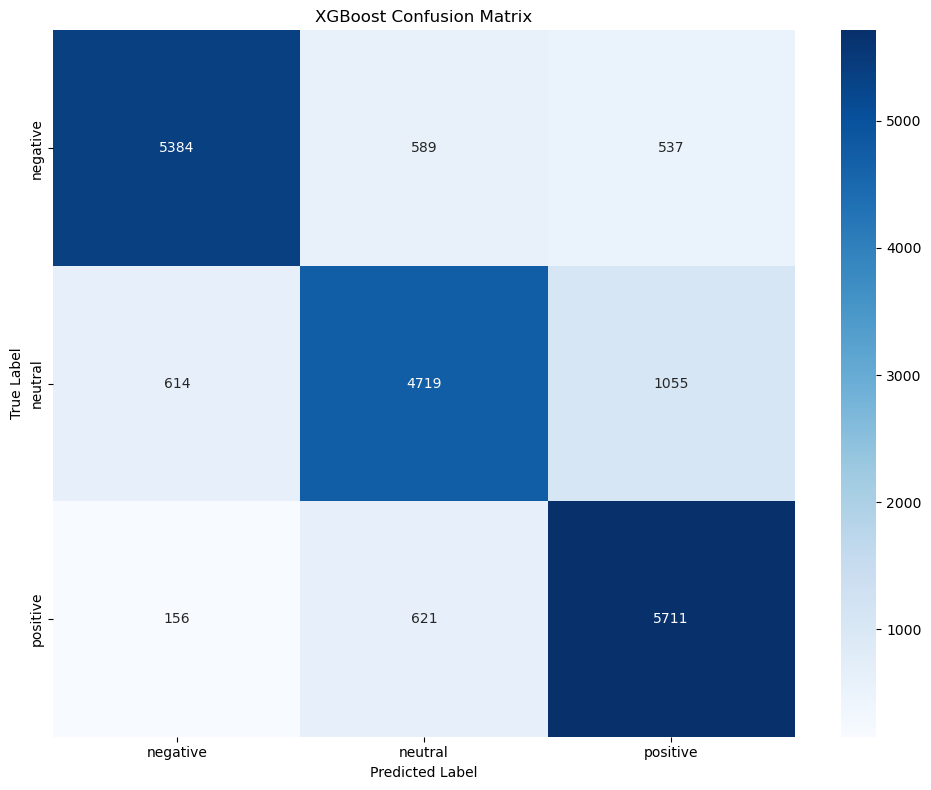

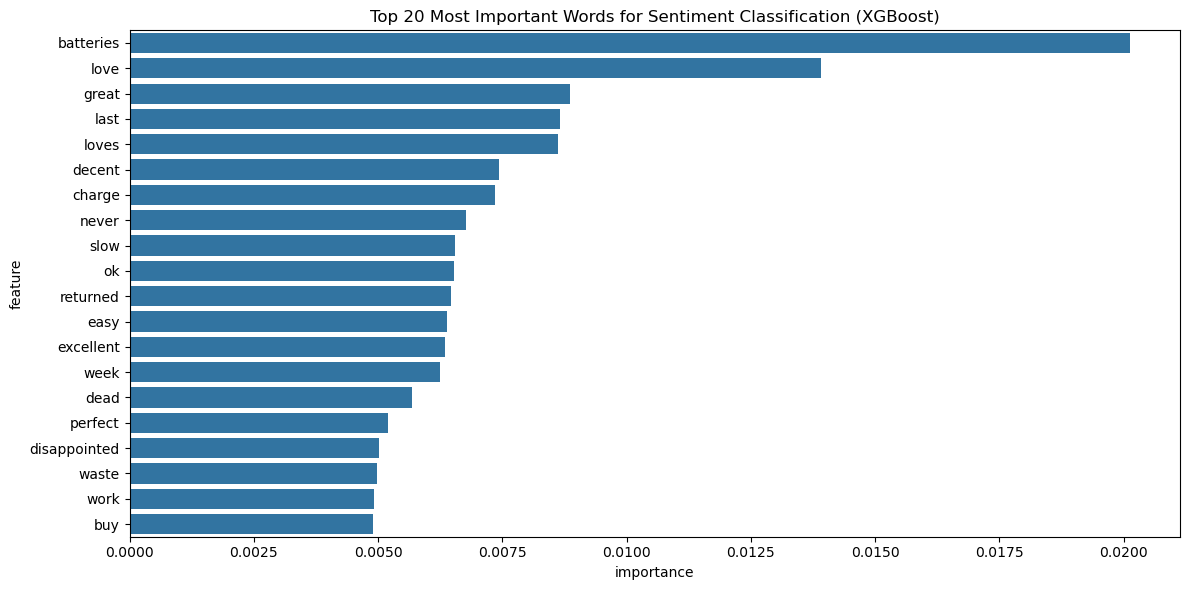

In [64]:
# Import necessary libraries
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Transform string labels to numbers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,    
    learning_rate=0.1,   
    max_depth=5,         
    min_child_weight=1,  
    subsample=0.8,       
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softmax',  
    num_class=3,         
    eval_metric='mlogloss'  
)

# Train the model with encoded labels
xgb_classifier.fit(
    X_train, 
    y_train_encoded,
    eval_set=[(X_train, y_train_encoded), 
              (X_test, y_test_encoded)],
    verbose=True
)

# Make predictions
y_pred_encoded = xgb_classifier.predict(X_test)

# Convert predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('XGBoost Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': tfidf_transformer.get_feature_names_out(),  # Changed from tfidf_vectorizer to tfidf_transformer
    'importance': xgb_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Words for Sentiment Classification (XGBoost)')
plt.tight_layout()
plt.show()



In [68]:
"""
# Learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    xgb_classifier, X_train, y_train,  # Changed from X_train_transformed to X_train
    cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot learning curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# Plot standard deviation bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves (XGBoost)')
plt.legend(loc='best')
plt.grid(True)
plt.show()
"""

"\n# Learning curves\nfrom sklearn.model_selection import learning_curve\n\ntrain_sizes, train_scores, test_scores = learning_curve(\n    xgb_classifier, X_train, y_train,  # Changed from X_train_transformed to X_train\n    cv=5, n_jobs=-1, \n    train_sizes=np.linspace(0.1, 1.0, 10)\n)\n\n# Plot learning curve\nplt.figure(figsize=(10,6))\nplt.plot(train_sizes, train_mean, label='Training score')\nplt.plot(train_sizes, test_mean, label='Cross-validation score')\n\n# Plot standard deviation bands\nplt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)\nplt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)\n\nplt.xlabel('Training Examples')\nplt.ylabel('Score')\nplt.title('Learning Curves (XGBoost)')\nplt.legend(loc='best')\nplt.grid(True)\nplt.show()\n"

## Voting Classier (Embsembling)

Accuracy: 0.76

Voting Classifier Results:

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.78      0.79       535
     neutral       0.70      0.66      0.68       494
    positive       0.78      0.83      0.80       477

    accuracy                           0.76      1506
   macro avg       0.76      0.76      0.76      1506
weighted avg       0.76      0.76      0.76      1506



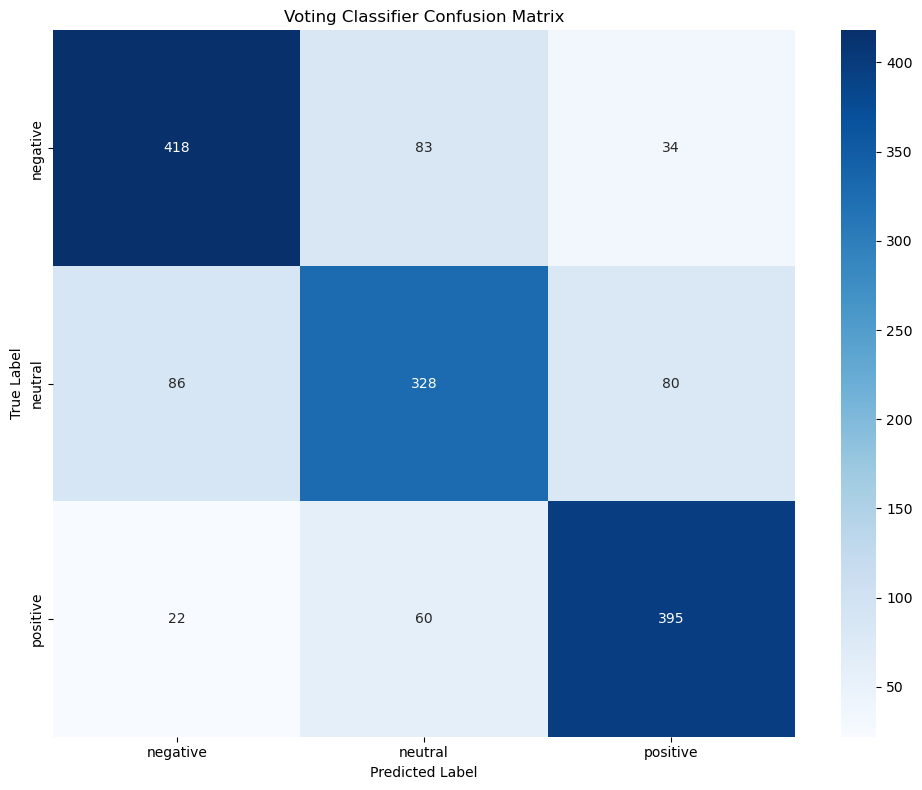

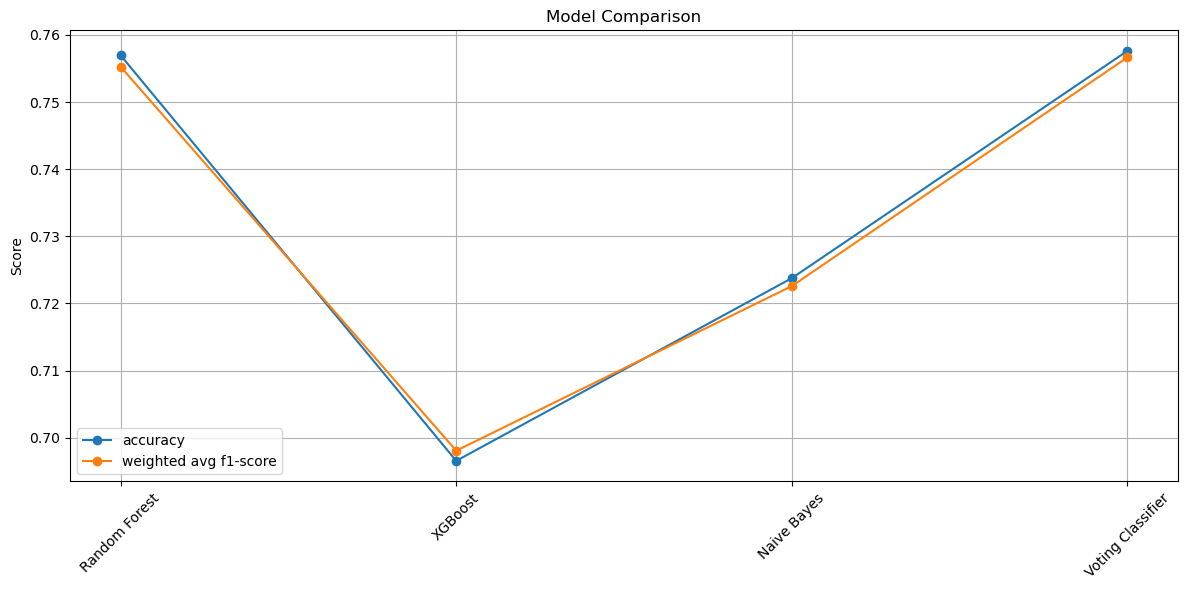

In [49]:
# Import necessary libraries
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create label encoder
label_encoder = LabelEncoder()
# Transform labels to numbers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create the base classifiers
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

xgb_classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

nb_classifier = MultinomialNB()

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('xgb', xgb_classifier),
        ('nb', nb_classifier)
    ],
    voting='soft'  # Using probability estimates for voting
)

# Train the voting classifier
voting_clf.fit(X_train_transformed, y_train_encoded)

# Make predictions
y_pred_encoded = voting_clf.predict(X_test_transformed)
# Convert predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nVoting Classifier Results:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Voting Classifier Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Compare with individual model performances
models = {
    'Random Forest': rf_classifier,
    'XGBoost': xgb_classifier,
    'Naive Bayes': nb_classifier,
    'Voting Classifier': voting_clf
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    if name != 'Voting Classifier':  # Skip voting classifier as it's already trained
        model.fit(X_train_transformed, y_train_encoded)
    
    # Make predictions
    y_pred_encoded = model.predict(X_test_transformed)
    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'accuracy': report['accuracy'],
        'weighted avg f1-score': report['weighted avg']['f1-score']
    }

# Create comparison plot
plt.figure(figsize=(12, 6))
metrics = ['accuracy', 'weighted avg f1-score']
for metric in metrics:
    scores = [results[model][metric] for model in results.keys()]
    x = range(len(results))
    plt.plot(x, scores, marker='o', label=metric)

plt.xticks(x, results.keys(), rotation=45)
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Stacking Classifier (Embedding)

In [ ]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create label encoder
label_encoder = LabelEncoder()
# Transform labels to numbers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42))
]

# Create the stacking classifier
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,  # number of folds for cross-validation
    stack_method='predict_proba'  # use probability predictions
)

# Train the stacking classifier
print("Training Stacking Classifier...")
stack_clf.fit(X_train_transformed, y_train_encoded)

# Make predictions
y_pred_encoded = stack_clf.predict(X_test_transformed)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Print classification report
print("\nStacking Classifier Results:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Stacking Classifier Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Compare with individual model performances
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Stacking Classifier': stack_clf
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    if name != 'Stacking Classifier':  # Skip stacking classifier as it's already trained
        print(f"\nTraining {name}...")
        model.fit(X_train_transformed, y_train_encoded)
    
    # Make predictions
    y_pred_encoded = model.predict(X_test_transformed)
    y_pred = label_encoder.inverse_transform(y_pred_encoded)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'accuracy': report['accuracy'],
        'weighted avg f1-score': report['weighted avg']['f1-score']
    }

# Create comparison plot
plt.figure(figsize=(12, 6))
metrics = ['accuracy', 'weighted avg f1-score']
for metric in metrics:
    scores = [results[model][metric] for model in results.keys()]
    x = range(len(results))
    plt.plot(x, scores, marker='o', label=metric)

plt.xticks(x, results.keys(), rotation=45)
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Weighted F1-score: {metrics['weighted avg f1-score']:.4f}")